# Machine Learning Project 

### Rainfall Prediction in Australia 

#### The dataset contains about 10 years of daily weather observations from many locations across Australia. 
#### The task is to predict next-day rain by training classification model (Logistic Regression) on the target variable RainTomorrow. 

### Importing libraries 

In [1]:
# packages/Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For splitting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import math 

#Performance metrices
from sklearn.metrics import roc_auc_score,roc_curve,auc,accuracy_score, classification_report

#For encoding the features
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore") 

### Loading the raw data 

In [2]:
# Loading the data 
data = pd.read_csv('weatherAUS.csv')

### Data Exploration   

In [3]:
# printing the shape 
print(data.shape)

(145460, 23)


##### There are 145,460 observations and 23 columns 

In [4]:
# running the first 5 rows
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
# checking descriptive statistics 
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
# Checcking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

##### There are both numeric and string variables

### Data Cleaning 


In [7]:
# Checking for NULL values 
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

##### From the results, features such as 'Evaporation', 'Sunshine', 'Cloud9am' and 'Cloud3pm' are missing over 55,000 values. This is very difficult to fix so these columns will be droped.

In [8]:
# dropping columns 
data = data.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1)

In [9]:
# checking columns after operation 
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
# review the datatypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

In [11]:
# probing the string variables 
data[['Date', 'Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']].head(10)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
5,2008-12-06,Albury,WNW,W,W,No,No
6,2008-12-07,Albury,W,SW,W,No,No
7,2008-12-08,Albury,W,SSE,W,No,No
8,2008-12-09,Albury,NNW,SE,NW,No,Yes
9,2008-12-10,Albury,W,S,SSE,Yes,No


##### Results indicates some categorical variables. The goal of the project is to focus on binary classification and therefore features such as Date, Location, WindGustDir, WindDir9am and WindDir3pm having multiple categories will not be relevant therefore has to be dropped.

In [12]:
# Removing unwanted features 
data.drop(['Date', 'Location','WindGustDir','WindDir9am', 'WindDir3pm'],axis=1,inplace=True)

In [13]:
# reviewing columns after operation 
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

##### There are two categorical variables which are the 'RainToday and 'RainTomorrow' and 'RainTomorrow is the target variable.

### Dealing with NULL values 

In [14]:
# Checking for NULL values 
data.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [15]:
# since we are dealing with both numeric and categorical variables so the variables are listed as such
list_num = data.dtypes != 'object'
list_obj = data.dtypes == 'object'
list_num

MinTemp           True
MaxTemp           True
Rainfall          True
WindGustSpeed     True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Temp9am           True
Temp3pm           True
RainToday        False
RainTomorrow     False
dtype: bool

##### A function to replace NULL values. Numeric Values that are NULL are replaced with mean values and categorical variables are replaced with  most frequently occurring values.  

In [16]:
# making lists of number and category columns
list_num = data.dtypes != 'object'
list_obj = data.dtypes == 'object'
# indexing the data frame using the column lists
num_col = data.columns[list_num].tolist()
cat_col = data.columns[list_obj].tolist()

# simple inputer function is used to fill the NULLS
imputer_num_mean = SimpleImputer(strategy = 'mean')
imputer_category = SimpleImputer(strategy = 'most_frequent')

In [17]:
# For loop to apply imputation
for col in data.columns.tolist():
    if col in num_col:
        data[col] = imputer_num_mean.fit_transform(data[[col]])
    else:
        data[col] = imputer_category.fit_transform(data[[col]])

In [18]:
#Check null values after operation 
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

##### NULL values has successfully been replaced

### Visualization of relationships between numeric variables

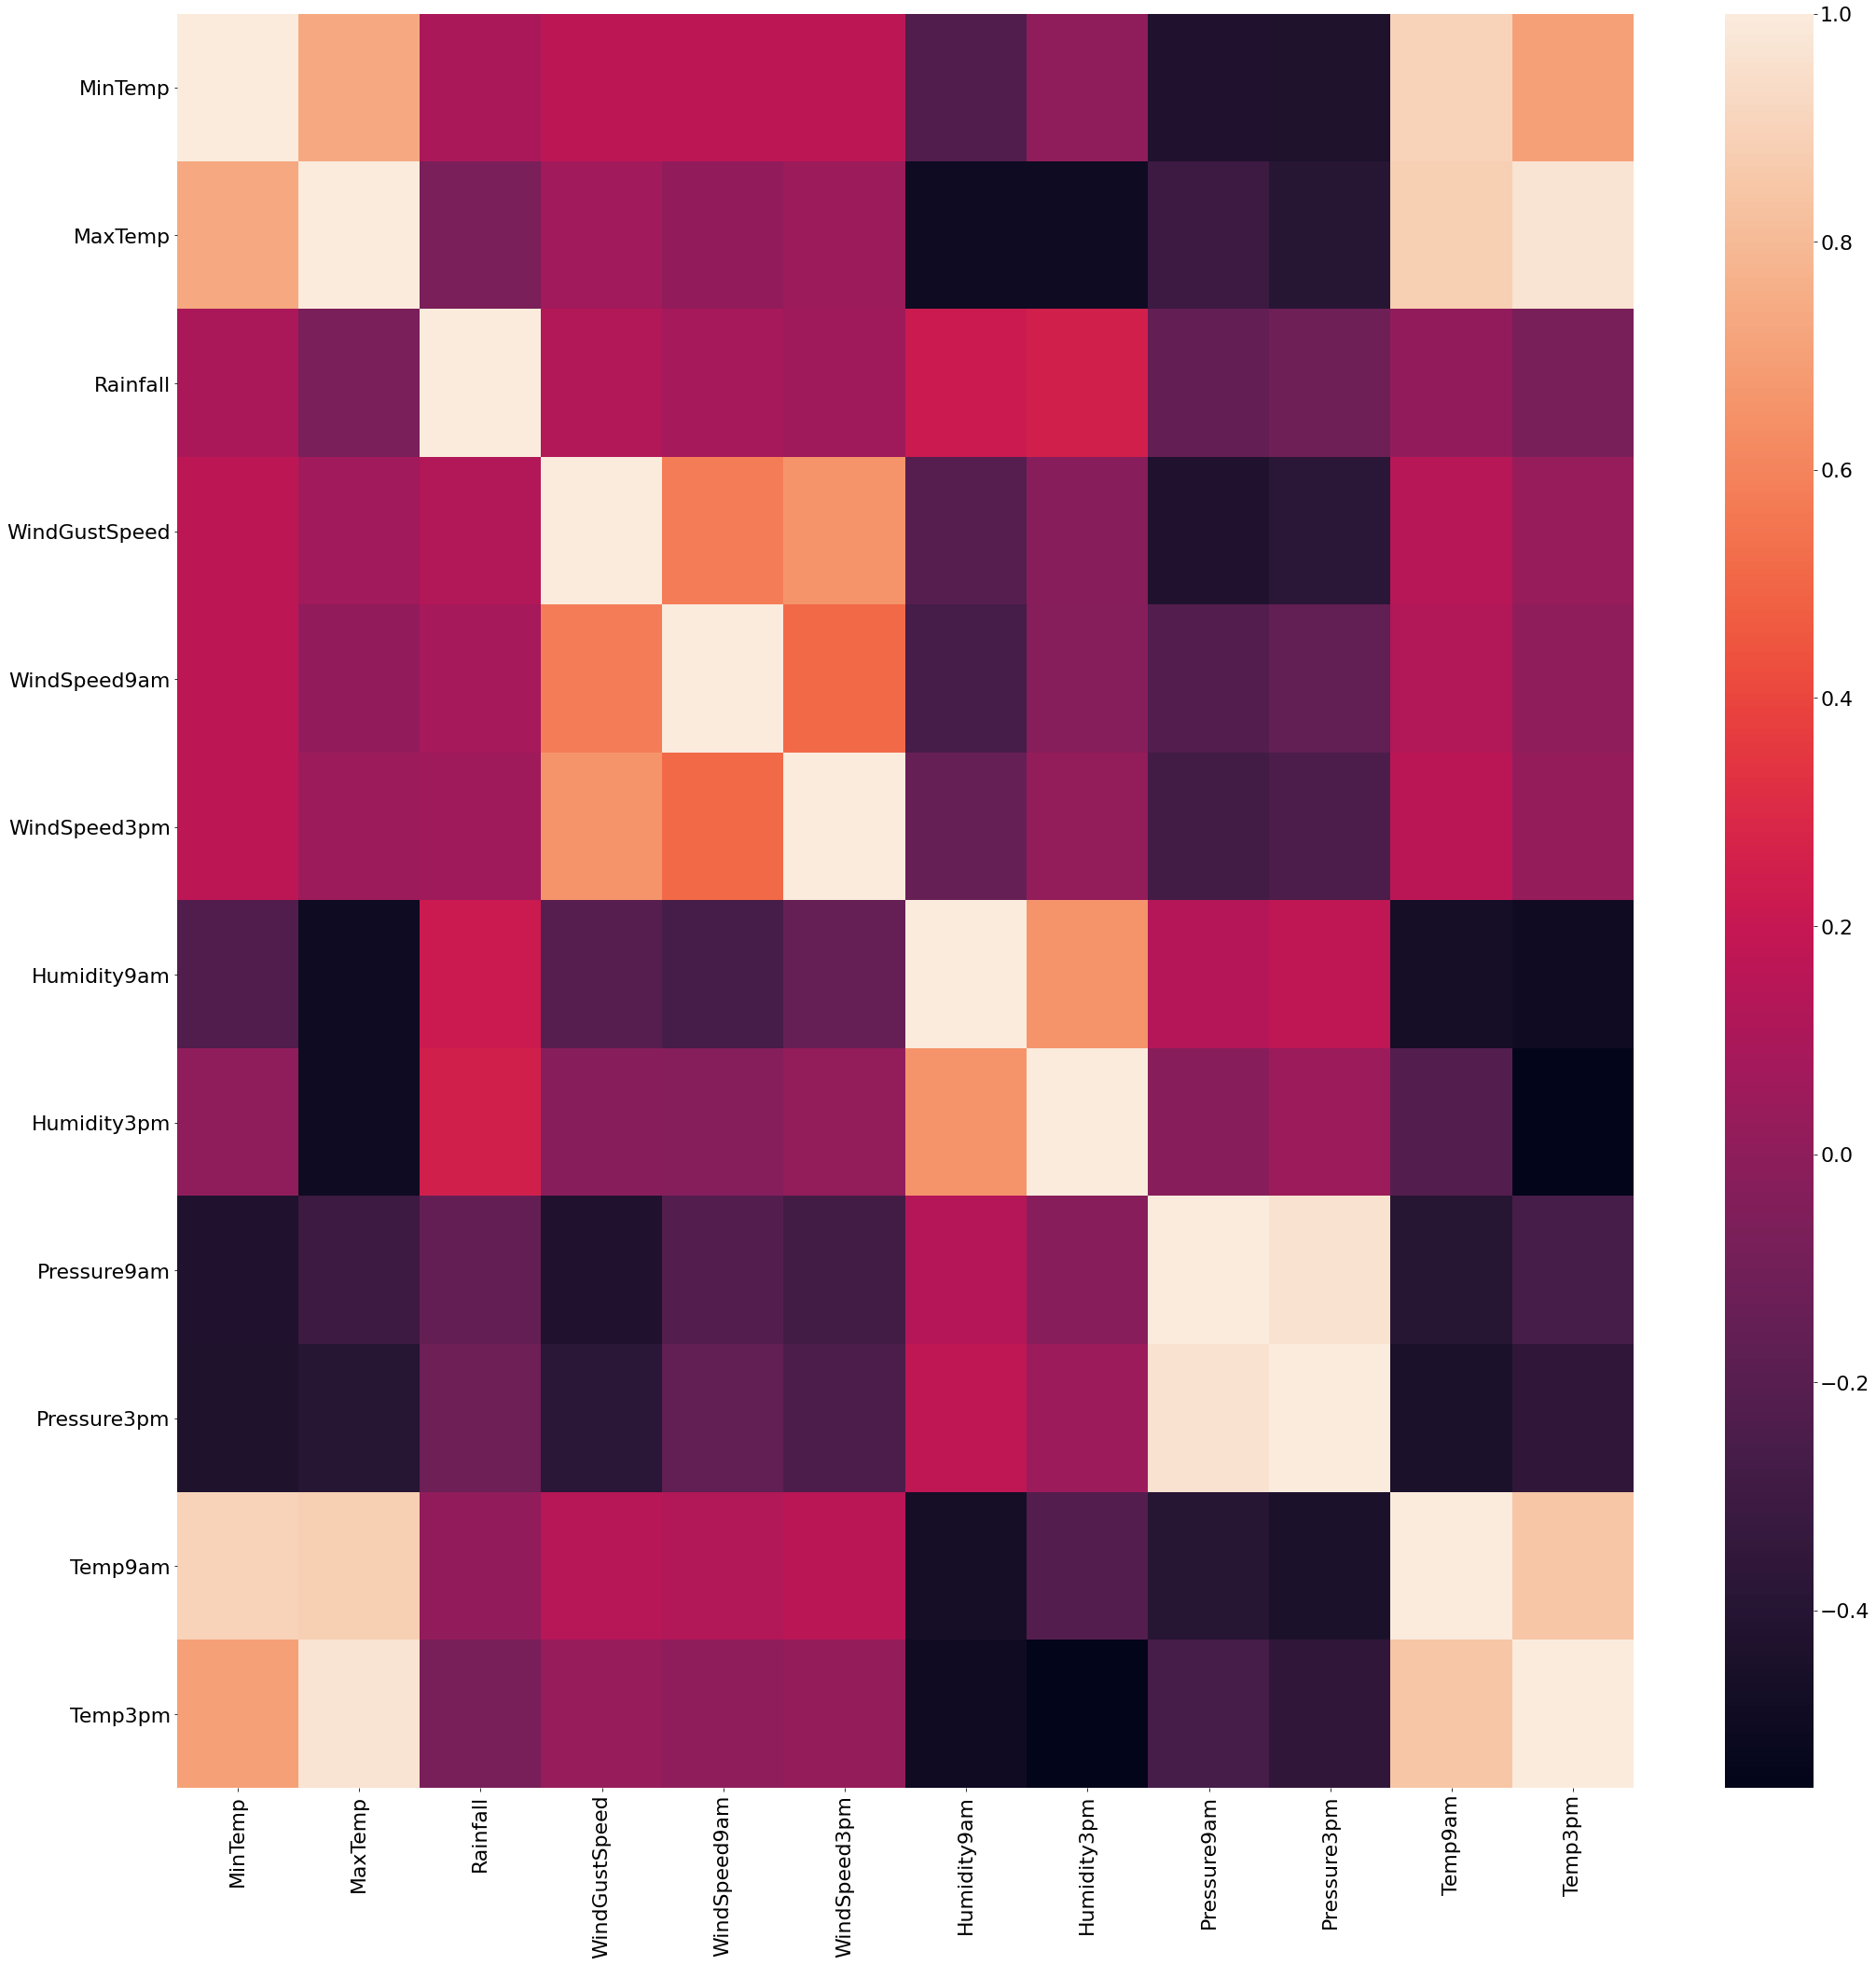

In [19]:
# Plotting correlation matrix 
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(35,35))
sns.heatmap(data.corr())
plt.show()

##### Not much information can be retained for the chart 

### Checking for outliers

<AxesSubplot:>

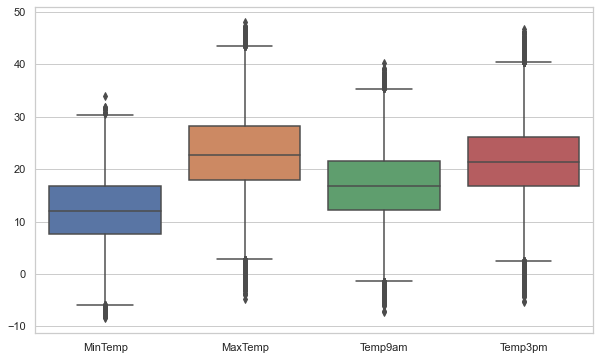

In [20]:
#Checcking for Outliers on some of the features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

##### From the box plot we can see that there are no outliers 


<AxesSubplot:>

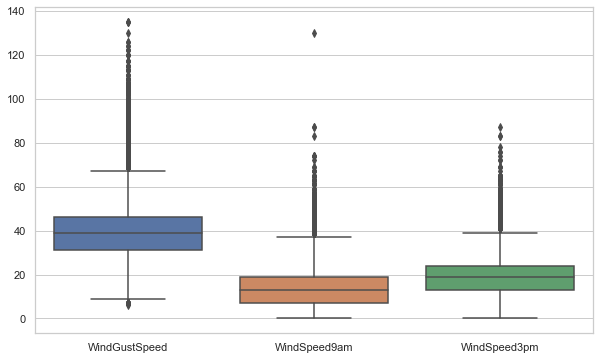

In [21]:
#Checcking for Outliers on some of the features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

##### Similarly there are no outliers here as well 


<AxesSubplot:>

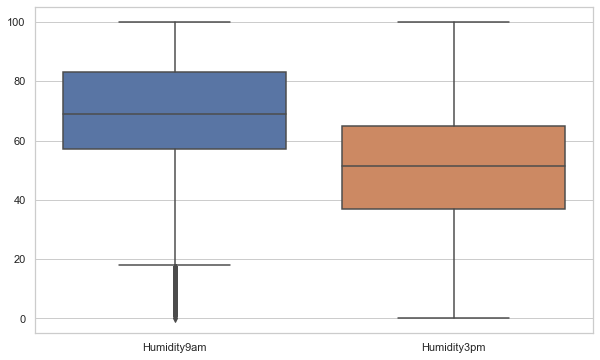

In [22]:
#Checcking for Outliers on some of the features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Humidity9am','Humidity3pm']])

<AxesSubplot:>

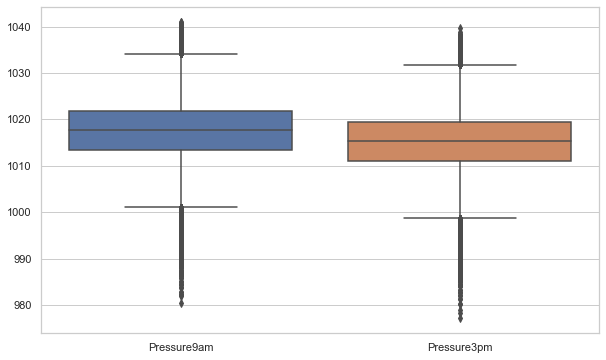

In [23]:
#Checcking for Outliers on some of the features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Pressure9am','Pressure3pm']])

##### No outliers found so far

<AxesSubplot:>

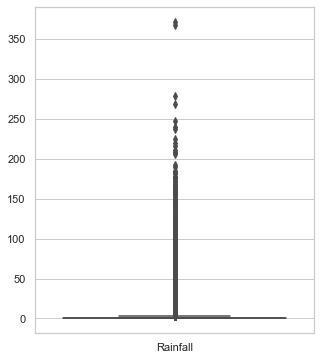

In [24]:
#Checcking for Outliers on some of the features
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data[['Rainfall']])

##### With the values for rainfall, values above 250 quite distant from the rest so values below 250 will be considered 

In [25]:
# Deleting the outlier 
data = data[data['Rainfall']<200]

<AxesSubplot:>

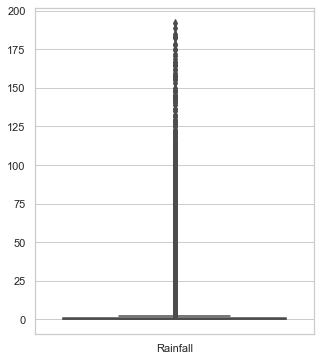

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data[['Rainfall']])

##### After deleting, the data is not useful, so it has to be droped 

In [27]:
# Removing unwanted features 
data.drop(['Rainfall'],axis=1,inplace=True)

In [28]:
# verifying delete
data.columns

Index(['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Feature Engineering 

##### 'RainToday' and 'RainTomorrow' are categorical variables and hence have to be converted to numerical ones 

In [29]:
# Converting 'RainTomorrow' to numeric
data['RainTomorrow'][data['RainTomorrow'] == 'Yes'] = 1
data['RainTomorrow'][data['RainTomorrow'] == 'No'] = 0

In [30]:
# Converting 'RainToday' to numeric
data['RainToday'][data['RainToday'] == 'Yes'] = 1
data['RainToday'][data['RainToday'] == 'No'] = 0

In [31]:
# displaying the first 10 rows of the two features
data[['RainToday','RainTomorrow']].head(10)

,RainToday,RainTomorrow
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,1
9,1,0


In [32]:
data.drop(['RainToday'],axis=1,inplace=True)

##### All categorical variables sucessfully converted to numerics 


### Model Training 

In [33]:
#spliting data into two, ofcourse the dependable variable is raintomorrow
Y= data['RainTomorrow']
X = data.drop(['RainTomorrow'],axis=1)
Y=Y.astype(int)


In [34]:
# printing the shape 
print(X.shape)
print(Y.shape)

(145446, 11)
(145446,)


In [35]:
# traing data is set at 80% and test data at 20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size=0.3, random_state=15)

In [43]:
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [44]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

In [45]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.8350980238085883
The Testing Accuracy is:  0.837122427464821
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     79551
           1       0.70      0.42      0.53     22261

    accuracy                           0.84    101812
   macro avg       0.78      0.69      0.71    101812
weighted avg       0.82      0.84      0.82    101812



### Evaluating the model

In [40]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
clf.predict(X_train)
y_pred = clf.predict(X_train)

# predict_proba - Probability estimates
pred_proba = clf.predict_proba(X_train)

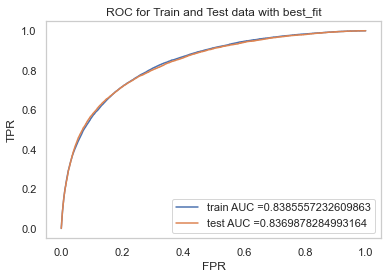

In [41]:
#Plotting AUC 
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.grid()
plt.show()

##### The rate of success by the model is 83% as shown by the area under the curve.

In [42]:
# Accuracy on Train
print("The Training Accuracy is: ", clf.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", clf.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.7656759517542137
The Testing Accuracy is:  0.764449741027639
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     79551
           1       0.48      0.75      0.58     22261

    accuracy                           0.77    101812
   macro avg       0.70      0.76      0.71    101812
weighted avg       0.82      0.77      0.78    101812



### The model is 76% accurate in predicting rainfall with the training data and 76% accurate with the test data. 

### In terms of precission, the model was 92% correct in prediciting no rainfall and 48% in prediciting a rainfall. 

### With regards to recall, the model was 77% correct when there was no rainfall and 75% correct when there was rainfall.

### F1-scores is the harmonic mean of the precission and recall values. It gets the best of both precission and recall. The model was 84% accurate when it predicted no rain and 58% when it predicted rainfall. 